## DATA 620 Final Project
#### Amazon Software Reviews

Benson Toi, Noah Collin, Ahmed Elsaeyed

#### Data source:
https://nijianmo.github.io/amazon/index.html

This is a text analyisis of Amazon reviews of software from 1998-2015

#### Dependencies

In [32]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import random
import nltk
#nltk.download('punkt')
from tqdm import tqdm, trange #for progress bars of computation in Jupyter, see https://www.youtube.com/watch?v=n4E7of9BINo

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Noah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
from transformers import pipeline

C:\Users\Noah\.conda\envs\NLTK etal\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print("Pandas version: {}".format(pd.__version__))
#print("datetime version: {}".format(datetime.__version__))
print("Seaborn version: {}".format(sns.__version__))

Pandas version: 1.4.2
Seaborn version: 0.11.2


In [4]:
df = pd.read_json('Software.json',  lines=True) #lines equal true because the CSV has \n chars
#again, data from here: 
# https://nijianmo.github.io/amazon/index.html

In [5]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [6]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN


In [7]:
def HumanTime (x):
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

HumanTime(df['unixReviewTime'][0])

'2014-03-11 00:00:00'

In [8]:
df['ReviewTime']= tqdm(df.unixReviewTime.apply(HumanTime))


100%|██████████| 459436/459436 [00:00<00:00, 4215047.31it/s]


In [9]:
df['ReviewTime'].head(3)

0    2014-03-11 00:00:00
1    2014-02-23 00:00:00
2    2014-02-17 00:00:00
Name: ReviewTime, dtype: object

In [10]:
df['Year'] = df['ReviewTime'].apply(lambda x: int(re.findall ("\d+", x)[0]))

In [11]:
df['Year'].value_counts().sort_index()

1998        1
1999      125
2000     1326
2001     2833
2002     4144
2003     4681
2004     4685
2005     6724
2006     8486
2007    13962
2008    17735
2009    20000
2010    15185
2011    17061
2012    22894
2013    46663
2014    77348
2015    86324
2016    66786
2017    29350
2018    13123
Name: Year, dtype: int64

In [12]:
df.reviewText.describe()

count     459370
unique    421432
top         good
freq         811
Name: reviewText, dtype: object

In [13]:
df.summary.describe()

count         459380
unique        286888
top       Five Stars
freq           51188
Name: summary, dtype: object

In [14]:
df.overall.value_counts().sort_index()

1    102548
2     31445
3     39395
4     73596
5    212452
Name: overall, dtype: int64

In [15]:
df.overall.describe() #Review Scores

count    459436.000000
mean          3.570175
std           1.626662
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [16]:
df['overall'].median()

4.0

In [17]:
df['style'].describe()

count                            234401
unique                              423
top       {'Platform:': ' PC Download'}
freq                              50647
Name: style, dtype: object

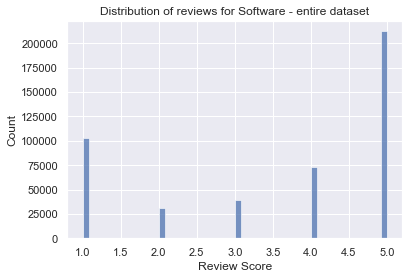

In [18]:
sns.set(style="darkgrid")
sns.histplot(df['overall']).set(title = "Distribution of reviews for Software - entire dataset",
                                        xlabel = 'Review Score')
plt.show()

Mostly five-star reviews.

In [19]:
oneStarReviews = df[df['overall']==1]
oneStarReviews.shape

(102548, 14)

In [20]:
twoStarReviews = df[df['overall']==2]
threeStarReviews = df[df['overall']==3]
fourStarReviews = df[df['overall']==4]
fiveStarReviews = df[df['overall']==5]

In [21]:
random.seed(6174)
#Kaprekar’s constant

In [22]:
randomSelection = random.choices(range(len(df)), k=1000) 
# we're going to work with 1000 reviews to lessen run times
#randomSelection

In [23]:
df1000 = df.loc[randomSelection,]
df1000.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015
391520,1,False,"06 29, 2007",AOWZQAE1TO0IA,B000AMPJPY,NaN,Science Minded,Very Buggy software that needs some rewriting....,Don't expect any help,1183075200,NaN,NaN,2007-06-29 00:00:00,2007


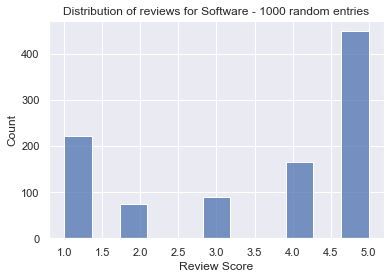

In [24]:
sns.set(style="darkgrid")
sns.histplot(df1000['overall']).set(
    title = "Distribution of reviews for Software - 1000 random entries",
    xlabel = 'Review Score')
plt.show()

This histogram of 1000 random rows resembles the one for the entire dataset

In [25]:
print("""The average score in the dataset was {} whereas 
the mean score for the 1000 random rows was {}.""".format(
round(df['overall'].mean(), 2),
round(df1000['overall'].mean(), 2)
     ))

The average score in the dataset was 3.57 whereas 
the mean score for the 1000 random rows was 3.55.


More rigourous comparisons of the dataset to the 1000 random samples could be done, but I'd say this 1000 random rows is representaive enough of the dataset for our puproses.

We'll also be making a df25 of the first 25 rows for troubleshooting, testing, and the reapply it all to the df1000 later.

In [26]:
df25 = df.loc[randomSelection[:25]]
df25.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015


In [33]:
vocab= []
for c, r in df1000.iterrows():
    tokens =( nltk.word_tokenize(r['reviewText']) )
    for token in tokens:
        vocab.append(token)

In [34]:
vocabulary = set(vocab) # to assure no duplicates.  As of now, we haven't handled capitalization

### Sentiment Analysis

In [35]:
classifier = pipeline("sentiment-analysis")
currentClassifierType = "sentiment-analysis" #This variable will be updated throughtout the notebook
#It assures that the correct classifier is in user
#Run the notebook in order to assure proper classifier


#This cell will download models the first time it's run.  
#These are large so don't use a metered connection if possible.
#default model used, link here:
#https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [36]:
def performDefaultSetntimentAnalysis(x):
    if(currentClassifierType != "sentiment-analysis"):
        print("You're using the wrong classifier!  Run the notebook in order.")
        return None
    try:
        return classifier(x)
    except:
        return"UNKNOWN"

In [37]:

df25['distilbert-base-uncased sentiment-analysis'] = tqdm(
    df25['reviewText'].apply(performDefaultSetntimentAnalysis)
,total = len(df25))
#This cell will take several minutes to run

100%|██████████| 25/25 [00:00<?, ?it/s]


In [38]:
df25.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year,distilbert-base-uncased sentiment-analysis
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016,"[{'label': 'NEGATIVE', 'score': 0.999703466892..."
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015,"[{'label': 'NEGATIVE', 'score': 0.993547618389..."
391520,1,False,"06 29, 2007",AOWZQAE1TO0IA,B000AMPJPY,NaN,Science Minded,Very Buggy software that needs some rewriting....,Don't expect any help,1183075200,NaN,NaN,2007-06-29 00:00:00,2007,"[{'label': 'NEGATIVE', 'score': 0.999778926372..."


### Zero shot classification

In [39]:
classifier = pipeline("zero-shot-classification")

currentClassifierType = "zero-shot-classification"
type(classifier)
#This cell involves a 1.5+ GB download

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


transformers.pipelines.zero_shot_classification.ZeroShotClassificationPipeline

In [40]:
#DELETE, testing, screwing around
classifier(
    "I just ate great Spanish food with my foes.",
    candidate_labels=["cuisine", "friendship","nihilism"],
)

{'sequence': 'I just ate great Spanish food with my foes.',
 'labels': ['cuisine', 'friendship', 'nihilism'],
 'scores': [0.9875638484954834, 0.0067010740749537945, 0.005735104903578758]}

In [41]:
def performZeroShotAnalysis(x, labs = ['endorsement','disapproval']):
    if (currentClassifierType != "zero-shot-classification"):
        print("You aren't using the right classifer now.  Rerun the cell with the ZeroShot.")
        return None
    try:
        return classifier (x, candidate_labels = labs)
    except:
        return "UNKNOWN"

In [42]:
performZeroShotAnalysis('I wish I hadn\'t bought this product.')
#So we can use this pipeline to to classify reviews 

{'sequence': "I wish I hadn't bought this product.",
 'labels': ['disapproval', 'endorsement'],
 'scores': [0.9734046459197998, 0.026595350354909897]}

In [43]:
df25['zero shot facebook/bart-large-mnli'] =  tqdm(df25['reviewText'].apply(performZeroShotAnalysis))

100%|██████████| 25/25 [00:00<00:00, 24977.99it/s]


In [44]:
df25['zero shot facebook/bart-large-mnli'].values[0:3]
#notice that the labels, "endorsement and dissaproval" change order.  TODO

array([{'sequence': 'Windows 10 updates all the time! Causing my computer to shut down and restart right in the middle of my projects!!! Garbage!', 'labels': ['disapproval', 'endorsement'], 'scores': [0.8000677824020386, 0.1999322772026062]},
       {'sequence': 'I have been using turbo tax from the start way back.  One year I even took  it H&R to see if it was anything different but they were charging $230.00  Guess what I am still using Turbo Tax with no regrets.', 'labels': ['endorsement', 'disapproval'], 'scores': [0.8479723930358887, 0.15202759206295013]},
       {'sequence': 'Very Buggy software that needs some rewriting.\nWhen you email problems the responses are either unreadagle of just useless.  Nuance are the new owners and it looks like they are trying to milk a cash cow without feeding it.', 'labels': ['disapproval', 'endorsement'], 'scores': [0.7127806544303894, 0.287219375371933]}],
      dtype=object)

In [45]:
#This function will always get the Endorsment rating first, then the disapproval rating second.
#The order can sometimes be given in an unexpected way.
#
def getEndorsementThenDissaproval(x):
    endorsementScore = 0
    disapprovalScore = 0
    try:
        if(x['labels'][0]=='endorsement'):
            endorsementScore = x['scores'][0]
            disapprovalScore = x['scores'][1]
            return [endorsementScore, disapprovalScore]
        elif (x['labels'][0]=='disapproval'):
            endorsementScore = x['scores'][1] #flip-flopped
            disapprovalScore = x['scores'][0] 
            return [endorsementScore, disapprovalScore]
        else:
            print('something wrong here')
            return [-2,-2]
    except:
        return [-1,-1]

In [46]:
getEndorsementThenDissaproval ( df25['zero shot facebook/bart-large-mnli'].values[21] )

[0.7803976535797119, 0.21960234642028809]

In [47]:
df25['zero shot facebook/bart-large-mnli'].values[21]

{'sequence': 'This game may be old, but it\'s still fun to play. You can choose the character you want to race with from over 10 characters, including SpongeBob, Catdog, Angelica, and, when you win in all three cups, the Mystery Rider. Even when you reveal who the Mystery Rider is, you can keep playing the game and win gold in the medium and hard modes. Once you beat every cup in every difficulty level, you can ride in a bonus round, which, in my opinion, is not that fun. In the bonus round, you\'re not racing against other characters. Instead, you have to collect a bunch of presents under the amount of time given. Besides that, the rest of the game is fun. The best part of this game is that every time you race, whether in a cup or just for fun, different things happen, which are usually funny. For example, some of the worlds have a few "glitch spots," which cause characters to wind up last. One time, Catdog got stuck on the wall of an obstacle, causing them to get 6th place. It looked

In [49]:
endorsementsList = []
disapprovalsList =[]
for i in df25['zero shot facebook/bart-large-mnli'].index:
    endorsementsList.append(
        getEndorsementThenDissaproval(
        df25['zero shot facebook/bart-large-mnli'][i]
                          )[0]
    )
    disapprovalsList.append(
        getEndorsementThenDissaproval(
        df25['zero shot facebook/bart-large-mnli'][i]
                          )[1]
    )

#for i in range(len(df25)):
#    print(df25['zero shot facebook/bart-large-mnli'][i])

In [50]:
df25['endorsement per zero shot facebook/bart-large-mnli']= endorsementsList
df25['disapproval per zero shot facebook/bart-large-mnli']= disapprovalsList

In [51]:
df25.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year,distilbert-base-uncased sentiment-analysis,zero shot facebook/bart-large-mnli,endorsement per zero shot facebook/bart-large-mnli,disapproval per zero shot facebook/bart-large-mnli
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016,"[{'label': 'NEGATIVE', 'score': 0.999703466892...",{'sequence': 'Windows 10 updates all the time!...,0.199932,0.800068
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015,"[{'label': 'NEGATIVE', 'score': 0.993547618389...",{'sequence': 'I have been using turbo tax from...,0.847972,0.152028
391520,1,False,"06 29, 2007",AOWZQAE1TO0IA,B000AMPJPY,NaN,Science Minded,Very Buggy software that needs some rewriting....,Don't expect any help,1183075200,NaN,NaN,2007-06-29 00:00:00,2007,"[{'label': 'NEGATIVE', 'score': 0.999778926372...",{'sequence': 'Very Buggy software that needs s...,0.287219,0.712781


In [52]:
df25['disapproval per zero shot facebook/bart-large-mnli'].mean()

0.5525741583108902

In [53]:
df25['overall'].mean()

2.88

In [54]:
df1000['overall'].mean()

3.546

#perform the same thing for the df1000 dataframe, after doing the zeroshot on df1000
endorsementsList = []
disapprovalsList =[]
for i in df1000['zero shot facebook/bart-large-mnli'].index:
    endorsementsList.append(
        getEndorsementThenDissaproval(
        df25['zero shot facebook/bart-large-mnli'][i]
                          )[0]
    )
    disapprovalsList.append(
        getEndorsementThenDissaproval(
        df25['zero shot facebook/bart-large-mnli'][i]
                          )[1]
    )

df1000['endorsement per zero shot facebook/bart-large-mnli']= endorsementsList
df1000['disapproval per zero shot facebook/bart-large-mnli']= disapprovalsList

In [61]:
df25['reviewText'][:3]

319057    Windows 10 updates all the time! Causing my co...
351090    I have been using turbo tax from the start way...
391520    Very Buggy software that needs some rewriting....
Name: reviewText, dtype: object

In [56]:
df25.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'ReviewTime', 'Year',
       'distilbert-base-uncased sentiment-analysis',
       'zero shot facebook/bart-large-mnli',
       'endorsement per zero shot facebook/bart-large-mnli',
       'disapproval per zero shot facebook/bart-large-mnli'],
      dtype='object')

In [57]:
df25.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year,distilbert-base-uncased sentiment-analysis,zero shot facebook/bart-large-mnli,endorsement per zero shot facebook/bart-large-mnli,disapproval per zero shot facebook/bart-large-mnli
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016,"[{'label': 'NEGATIVE', 'score': 0.999703466892...",{'sequence': 'Windows 10 updates all the time!...,0.199932,0.800068
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015,"[{'label': 'NEGATIVE', 'score': 0.993547618389...",{'sequence': 'I have been using turbo tax from...,0.847972,0.152028
391520,1,False,"06 29, 2007",AOWZQAE1TO0IA,B000AMPJPY,NaN,Science Minded,Very Buggy software that needs some rewriting....,Don't expect any help,1183075200,NaN,NaN,2007-06-29 00:00:00,2007,"[{'label': 'NEGATIVE', 'score': 0.999778926372...",{'sequence': 'Very Buggy software that needs s...,0.287219,0.712781


### Named Entity Recognition

In [63]:
#https://huggingface.co/dslim/bert-base-NER?text=My+name+is+Wolfgang+and+I+live+in+Berlin
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

Downloading: 100%|██████████| 59.0/59.0 [00:00<00:00, 59.1kB/s]
Downloading: 100%|██████████| 829/829 [00:00<00:00, 415kB/s]
Downloading: 100%|██████████| 208k/208k [00:00<00:00, 3.62MB/s]
Downloading: 100%|██████████| 2.00/2.00 [00:00<00:00, 2.00kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 112kB/s]
Downloading: 100%|██████████| 413M/413M [01:05<00:00, 6.57MB/s] 


[{'entity': 'B-PER', 'score': 0.9990139, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


In [64]:
#O 	Outside of a named entity
#B-MIS 	Beginning of a miscellaneous entity right after another miscellaneous entity
#I-MIS 	Miscellaneous entity
#B-PER 	Beginning of a person’s name right after another person’s name
#I-PER 	Person’s name
#B-ORG 	Beginning of an organization right after another organization
#I-ORG 	organization
#B-LOC 	Beginning of a location right after another location
#I-LOC 	Location

In [66]:
df25['NER dslim bert-base'] = df25['reviewText'].apply(lambda x: nlp(x))

In [73]:
df25['Num of Recognized Entites dslim bert-base'] = df25['NER dslim bert-base'].apply(lambda x: len(x))

In [74]:
df25.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year,distilbert-base-uncased sentiment-analysis,zero shot facebook/bart-large-mnli,endorsement per zero shot facebook/bart-large-mnli,disapproval per zero shot facebook/bart-large-mnli,NER dslim bert-base,Num of Recognized Entites dslim bert-base
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016,"[{'label': 'NEGATIVE', 'score': 0.999703466892...",{'sequence': 'Windows 10 updates all the time!...,0.199932,0.800068,"[{'entity': 'B-MISC', 'score': 0.9983368, 'ind...",2
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015,"[{'label': 'NEGATIVE', 'score': 0.993547618389...",{'sequence': 'I have been using turbo tax from...,0.847972,0.152028,"[{'entity': 'B-ORG', 'score': 0.9976609, 'inde...",3
391520,1,False,"06 29, 2007",AOWZQAE1TO0IA,B000AMPJPY,NaN,Science Minded,Very Buggy software that needs some rewriting....,Don't expect any help,1183075200,NaN,NaN,2007-06-29 00:00:00,2007,"[{'label': 'NEGATIVE', 'score': 0.999778926372...",{'sequence': 'Very Buggy software that needs s...,0.287219,0.712781,"[{'entity': 'B-MISC', 'score': 0.63482374, 'in...",1
65569,4,True,"06 16, 2012",A24K4130JIZCC6,B0014X2UAK,NaN,iTanz,I ordered this product with expedited shipping...,iWork Rox,1339804800,NaN,NaN,2012-06-16 00:00:00,2012,"[{'label': 'POSITIVE', 'score': 0.971159636974...",{'sequence': 'I ordered this product with expe...,0.940535,0.059465,"[{'entity': 'B-ORG', 'score': 0.9159029, 'inde...",6
192359,1,False,"02 10, 2014",ABVYGB2TKBO8F,B00E6LJBUO,NaN,J. Donaldson,Update Nov 2016\nI continue to wonder why Intu...,Intuit doesn't listen to it's customers.,1391990400,3,NaN,2014-02-10 00:00:00,2014,"[{'label': 'NEGATIVE', 'score': 0.999666571617...",{'sequence': 'Update Nov 2016 I continue to wo...,0.101943,0.898057,"[{'entity': 'B-ORG', 'score': 0.9908736, 'inde...",31
